<a href="https://colab.research.google.com/github/Tony6512/Probability-Puzzles/blob/main/probability_puzzles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulations for Puzzles

Note that some problems are duplicates (or closely related) to others. For this reason, some problems may or may not show up multiple times.

In [ ]:
import random
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tqdm import tqdm

## OpenQuant

The following problems (below) I personally programmed as there was no code provided on openquant (https://openquant.co/questions).

In [ ]:
## Digit Sum of 19
def digitSum(n_numbers = 1_000_000):
  count = 0
  for val in range(1, n_numbers + 1):
    val_sum = sum(int(i) for i in str(val))
    if val_sum == 19:
      count += 1
  return count

In [ ]:
digitSum()

30492

In [ ]:
## Consecutive Heads (also on brain stellar)
def consecutiveHeads(n_heads = 3, iters = 100_000):
  avg_count = consecutiveHeadsHelper(n_heads)
  for i in range(2, iters+1):
    avg_count = avg_count * ( (i-1) / i ) + consecutiveHeadsHelper(n_heads) / i
  return avg_count

def consecutiveHeadsHelper(n_heads):
  count = 0
  consec_heads = 0
  while consec_heads < n_heads:
    coin = random.randint(0,1) ## 1 is heads
    if coin:
      consec_heads += 1
    else:
      consec_heads = 0
    count += 1
  return count

# def consecutiveHeadsHelper(n_heads, consec_heads = 0): ## recursion
#   if n_heads == consec_heads:
#     return 0
#   coin = random.randint(0,1) ## 1 is heads
#   if coin:
#     return consecutiveHeadsHelper(n_heads, consec_heads + 1) + 1
#   else:
#     return consecutiveHeadsHelper(n_heads, 0) + 1

In [ ]:
consecutiveHeads() # n_head = [1,2,3] -> [2, 6, 14]

13.992889999999896

In [ ]:
## How Many Heads
def howManyHeads(flips = 12, iters = 100_000):
  avg_count = flippingCoin(flips)
  for i in range(2, iters + 1):
    avg_count = avg_count * (i-1) / i + flippingCoin(flips) / i
  return avg_count

def defineHat():
  hat = dict()
  hat['coin1'] = [0] * 2 + [1]
  hat['coin2'] = [0] + [1] * 2
  hat['coin3'] = [1]
  for coin in hat:
    random.shuffle(hat[coin])
  return hat

def selectingCoin():
  n_heads = 0
  hat = defineHat()
  while n_heads < 2:
    select_coin = random.choice(['coin1', 'coin2', 'coin3'])
    for _ in range(2):
      side = random.choice(hat[select_coin])
      if side != 1:
        n_heads = 0
        break
      else:
        n_heads += 1
  return select_coin

def flippingCoin(flips):
  select_coin = selectingCoin()
  hat = defineHat()
  count = 0
  for _ in range(flips):
    side = random.choice(hat[select_coin])
    if side:
      count += 1
  return count

In [ ]:
howManyHeads()

10.280500000000071

In [ ]:
## 12 flips
72/7

10.285714285714286

In [ ]:
## First to 50
def firstToN(N = 50):
  '''
  returns starting integer player should choose to win
  '''
  ## first to 50 wins
  ## can go up 1,.., 10
  return N % (10 + 1)

def wantedNumbers(N = 50, reverse = False):
  '''
  returns list of int that the player should choose to get first to N

  reverse: (default is False) if False the first player to get to N wins else
          if True the first player to N loses
  '''
  if reverse:
    N = N-1
  q, r = divmod(N, 11)
  lst = [-1] * q
  for i in range(0, q):
    lst[i] = r + 11*i
  return lst + [N]

In [ ]:
firstToN()

6

In [ ]:
wantedNumbers()

[6, 17, 28, 39, 50]

In [ ]:
wantedNumbers(reverse = True)

[5, 16, 27, 38, 49]

In [ ]:
## Expected Value of the Highest Die
def highestDie(iters = 100_000):
  avg_val = highestDieHelper()
  for i in range(2, iters + 1):
    avg_val = avg_val * (i-1) / i + highestDieHelper() / i
  return avg_val

def highestDieHelper():
  roll_die = lambda : random.randint(1,6)
  return max(roll_die(), roll_die())

In [ ]:
highestDie()

4.470829999999918

In [ ]:
161/36

4.472222222222222

In [ ]:
## Even Flips
def EvenFlips(iters = 100_000):
  count = 0
  for _ in range(iters):
    count += EvenFlipsHelper()
  return count / iters

def EvenFlipsHelper():
  n_flips = 0
  consec_heads = 0
  consec_tails = 0
  while consec_heads < 2 and consec_tails < 2:
    coin_flip = random.randint(0,1)
    n_flips += 1
    if coin_flip == 0:
      consec_tails += 1
      consec_heads = 0
    else:
      consec_heads += 1
      consec_tails = 0
  return 1 if n_flips % 2 == 0 else 0

In [ ]:
EvenFlips()

0.66589

In [ ]:
## same birthday
class Solution:
  def sameBirthday(self, n = 3 ,trials = 100_000):
    '''
    probability at least 2 people of n at same birthday
    '''
    count = 0
    for trial in range(trials):
      count += self.samebirthdayHelper(n)
    return count / trials


  def samebirthdayHelper(self, n):
    people = [random.randint(1,365) for _ in range(n)]
    if len(people) == len(set(people)):
      return 0
    return 1

  def birthdayThreshold(self, threshold = 0.5):
    '''
    smallest number of people (n) required so that the prob of same birthday of
    those n people is greater than threshold
    '''
    left, right = 0, 365
    while left <= right:
      mid = (left + right) // 2
      p = self.sameBirthday(mid)
      if p < threshold:
        left = mid + 1
      else:
        right = mid - 1
    return left

  def birthdayAsYou(self, n = 3, trials = 100_000):
    '''
    probability of a group of n people (including you) having the same birthday
    as you
    '''
    count = 0
    for trial in range(trials):
      count += self.birthdayAsYouHelper(n)
    return count / trials

  def birthdayAsYouHelper(self, n):
    your_birthday = random.randint(1, 365)
    if n == 1:
      return 1
    people = [random.randint(1,365) for _ in range(n-1)]
    if your_birthday in people:
      return 1
    return 0

  def birthdayLine(self):
    prev = 0
    current = 1 / 365
    result = 2
    while prev < current:
      result += 1
      prev = current
      current = current *( 365 - (result - 1) + 1) / 365 * (result - 1) / (result-2)
    return result

In [ ]:
sol = Solution()
sol.sameBirthday()

0.00851

In [ ]:
sol = Solution()
sol.birthdayThreshold()

23

In [ ]:
sol = Solution()
sol.birthdayAsYou()

0.0056

In [ ]:
sol = Solution()
sol.birthdayLine()

21

In [ ]:
## Pirate Loot
def pirateLoot(pirates = 5, coins = 100):
  dp = [-1] * (pirates + 1)
  dp[1] = coins
  i = 1
  while True:
    if i+1 < pirates+1:
      dp[i+1] = dp[i]
    if i+2 < pirates+1:
      dp[i+2] = dp[i] - 1
    else:
      break
    i += 2
  return dp[-1]

In [ ]:
pirateLoot()

98

In [ ]:
## Royal Card Game
def royalCardGame(iters = 100_000):
  avg_val = royalCardGameHelper()
  for i in range(2, iters + 1):
    avg_val = avg_val *(i-1) / i + royalCardGameHelper() / i
  return avg_val

def royalCardGameHelper():
  deck = [str(i) for i in range(2, 11)] + ['Jack', 'Queen', 'King', 'Ace', 'Joker']
  random.shuffle(deck)
  cards_pulled = set()
  while deck:
    card = random.sample(deck, k = 1)[0]
    deck.remove(card)
    if card == 'Joker':
      for face in ['Jack', 'Queen', 'King']:
        if face not in cards_pulled:
          return 0
      return 100
    cards_pulled.add(card)


In [ ]:
royalCardGame()

25.01900000000013

In [ ]:
# help(random.sample)

## Brain Stellar

The website is here: https://brainstellar.com/.

In [ ]:
## rolling the bullet
def rollingBullet(rolling = True, iters = 100_000):
  avg_value = rollingBulletHelper(rolling)
  for i in range(2, iters+1):
    avg_value = avg_value + (rollingBulletHelper(rolling) - avg_value) / i
    # avg_value = avg_value *(i-1) / i + rollingBulletHelper() / i
  return avg_value

def rollingBulletHelper(rolling):
  cylinder = ['b'] * 2 + ['o'] * 4
  while cylinder[0] == 'b':
    k = random.randint(1,len(cylinder))
    cylinder = rotate(cylinder, k)
  cylinder.pop(0)
  if rolling:
    k = random.randint(1,len(cylinder))
    cylinder = rotate(cylinder, k)  ## bullets may be non-consecutive
  return 1 if cylinder[0] == 'b' else 0

def rotate(lst, k):
  n = len(lst)
  k = k % n
  temp = lst[n-k:]
  for i in range(n-k-1, -1, -1):
    lst[i+k] = lst[i]
  lst[0:k] = temp
  return lst

In [ ]:
rollingBulletHelper(rolling = True)

1

In [ ]:
lst = [1,2,3,4]
rotate(lst, 1)

[4, 1, 2, 3]

In [ ]:
rollingBullet()

0.4017899999999994

In [ ]:
## Lucky Candy (Balls in Urns)

def luckyCandy(n = 50):
  options = [(i,j) for i in range(n+1) for j in range(n+1)]
  options.remove((0,0)) ## cannot divide by 0
  options.remove((n,n))

  max_prob = -1
  for x,y in options: ## x is good candy, y is bad candy
    prob = 0.5 * x / (x+y) + 0.5 * (n-x) / (n - x + n - y)
    if prob > max_prob:
      max_prob = prob
      box1 , box2 = [x,y], [n-x, n-y]
  return  [max_prob, box1, box2]

In [ ]:
luckyCandy()

[0.7474747474747475, [1, 0], [49, 50]]

In [ ]:
### All Girls World
def allGirls(iters = 100_000):
  result = 0
  total = 0
  for _ in range(iters):
    g, b = allGirlsHelper()
    result += g
    total += b + g
  return result / total

def allGirlsHelper():
  g, b = 0, 0
  child = random.randint(0,1)
  while child:
    b += 1
    child = random.randint(0,1)
  g += 1
  return g, b

In [ ]:
allGirls()

0.5009568275406026

In [ ]:
## Drunk Passenger

### iterative (no trials)
def drunkPassenger(n = 100):
  pass_n = [0.5] * (n+1)
  for i in range(3, n + 1):
    pass_n[i] = (1/i) + (1/i) * sum(pass_n[2:i])
  return pass_n[-1]


#### multiple trials

# def drunkPassenger(n = 100, iters = 100_000):
#   avg_value = drunkPassengerHelper(n)
#   for i in range(2, iters + 1):
#     avg_value = avg_value * (i-1) / i + drunkPassengerHelper(n) / i
#   return avg_value

# def drunkPassengerHelper(n):
#   chairs = [-1] * n
#   for i in range(n):
#     if i == 0 or chairs[i] != -1:
#       chair = random.randint(0, n-1)
#       while chairs[chair] != -1:
#         chair = random.randint(0, n-1)
#       chairs[chair] = i
#     else:
#       chairs[i] = i
#   return 1 if chairs[n-1] == n-1 else 0

In [ ]:
drunkPassenger()

0.5

In [ ]:
## random ratio
def randomRatio(picture = True, iters = 100_000):
  result = 0
  x_points, y_points = [0] * iters, [0] * iters
  xy_pointer = 0
  for _ in range(iters):
    x, y = random.uniform(0, 1), random.uniform(0,1)
    if 1 <= x/ y <= 2:
      result += 1
      if picture:
        x_points[xy_pointer] = x
        y_points[xy_pointer] = y
        xy_pointer += 1
  if picture:
    plt.plot(x_points[0:xy_pointer], y_points[0:xy_pointer])
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'$1 \leq X/Y \leq 2$')
    plt.show()
  return result / iters

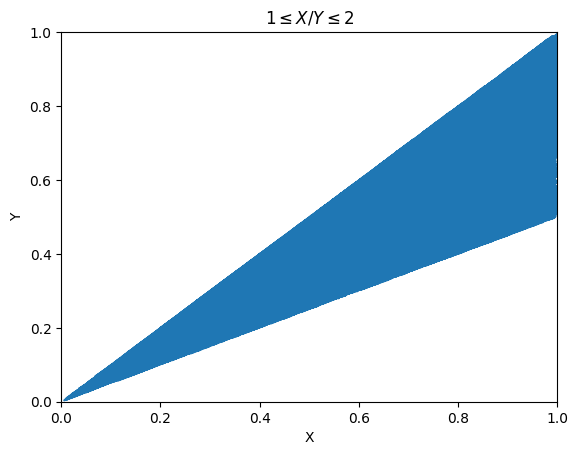

0.25089

In [ ]:
randomRatio()

In [ ]:
## second chance
def secondChance(chances = 2):
  die = [i for i in range(1,6+1)]
  EV = sum(die) / len(die)
  for i in range(2, chances + 1):
    die = [EV if EV > i else i for i in die]
    EV = sum(die) / len(die)
  return EV

In [ ]:
secondChance()

4.25

In [ ]:
for chances in range(1, 10+1):
  print(f'{chances} chances: EV = {secondChance(chances = chances):0.3f}')

1 chances: EV = 3.500
2 chances: EV = 4.250
3 chances: EV = 4.667
4 chances: EV = 4.944
5 chances: EV = 5.130
6 chances: EV = 5.275
7 chances: EV = 5.396
8 chances: EV = 5.496
9 chances: EV = 5.580
10 chances: EV = 5.650


In [ ]:
## Number of Double Heads

def doubleHeadsIter(tosses = 10, iters = 100_000):
  avg_val = doubleHeadsIterHelper(tosses)
  for i in range(2, iters + 1):
    avg_val = avg_val * (i-1) / i + doubleHeadsIterHelper(tosses) / i
  return avg_val

def doubleHeadsIterHelper(tosses):
  count = 0
  flips = [random.randint(0,1) for _ in range(10)]
  for i in range(tosses - 1):
    if flips[i] == flips[i+1] == 1:
      count += 1
  return count

def doubleHeadsRecur(tosses = 10, iters = 100_000):
  avg_val = doubleHeadsRecurHelper(tosses)
  for i in range(2, iters + 1):
    avg_val = avg_val * (i-1) / i + doubleHeadsRecurHelper(tosses) / i
  return avg_val

def doubleHeadsRecurHelper(tosses):
  if tosses == 1:
    return 0
  coin = random.randint(0,1)
  if not coin:
    return doubleHeadsRecurHelper(tosses-1)
  else:
    coin = random.randint(0,1)
    if not coin:
      return doubleHeadsRecurHelper(tosses-1)
    else:
      return doubleHeadsRecurHelper(tosses-1) + 1

In [ ]:
doubleHeadsIter()

2.253309999999945

In [ ]:
doubleHeadsRecur()

2.251330000000061

In [ ]:
## sum to one
def sumToOne(iters = 100_000):
  EV = sumToOneHelper()
  for i in range(2, iters + 1):
    EV += (sumToOneHelper() - EV) / i
  return EV

def sumToOneHelper():
  count = 0
  sum_val = 0
  while sum_val <= 1:
    x = random.uniform(0,1)
    sum_val += x
    count += 1
  return count

In [ ]:
sumToOne()

2.7164700000000006

In [ ]:
## Random Walk

def randomWalk(a, b, iters = 100_000):
  avg_val = randomWalkHelper(a,b)
  for i in tqdm(range(2, iters + 1)):
    avg_val = avg_val * (i-1) / i + randomWalkHelper(a,b) / i
  return avg_val

def randomWalkHelper(a,b):
  pointer = 0
  while b < pointer < a:
    step = random.choice([-1,1])
    pointer += step
  return 1 if pointer == a else 0

In [ ]:
a, b = 2, -3
# a,b  = 83, -17
randomWalk(a, b)

100%|██████████| 99999/99999 [00:00<00:00, 120169.34it/s]


0.600370000000003

In [ ]:
## P_a = b / (a+b)
abs(b) / (a+abs(b))

0.6

In [ ]:
## breaking stick
def breakingStickSim(iters = 100_000):
  def simulation():
    for _ in range(iters):
      x = random.uniform(0,1)
      smaller_piece = min(x, 1-x)
      return smaller_piece
  avg_val = simulation()
  for i in range(2, iters + 1):
    avg_val = avg_val * (i-1) / i + simulation() / i
  return avg_val

In [ ]:
breakingStickSim()

0.2506549816099686

## The Green Book

In [ ]:
## chess tournament

def chessTournament(n = 5):
  ### 1 and 2 must be in different brackets
  ### place 1 in bracket1, there are 0.5 * 2 **n places in bracket2
  ### total spots 2 ** n -1 (exclude spot for 1)
  return 0.5 * 2 ** n / (2 ** n -1)


# def chessTournament(n = 5, iters = 100_000):
#   avg_value = chessTournamentHelper(n)
#   for i in range(2, iters + 1):
#     avg_value += (chessTournamentHelper(n) - avg_value) / i
#   return avg_value

# def chessTournamentHelper(n):
#   players = [i for i in range(1, 2**n +1)]
#   random.shuffle(players)
#   bracket1, bracket2 = players[0:2**n//2 +1], players[2**n//2 +1:]
#   if 1 in bracket1 and 2 in bracket1:
#     return 0
#   elif 1 in bracket2 and 2 in bracket2:
#     return 0
#   return 1

In [ ]:
chessTournament()

0.5161290322580645

In [ ]:
## Applications letters
def frequentist(n = 5, trials = 100_000):
  count = 0
  for i in range(trials):
    count += frequentistHelper(n)
  return count / trials

def frequentistHelper(n):
  letters = [i for i in range(n)]
  random.shuffle(letters)
  for letter, envelope in enumerate(letters):
    if letter == envelope:
      return 0
  return 1

def inclusionExclusion(n = 5):
  ## inclusion exclusion
  p_union = 0
  for k in range(1,n+1):
    p_union += (-1) ** (k+1) * nChoosek(n, k) * factorial(n - k) / factorial(n)
  return 1 - p_union

def derangement(n = 5):
  ## derangement
  result = 0
  for i in range(n+1):
    result += (-1) ** i / factorial(i)
  return result

def nChoosek(n,k):
  if k > n:
    raise ValueError("Make sure n >= k.")
  result = 1
  if n-k < k:
    k = n-k   ## (n k) = (n n-k)
  for i in range(1, k+1):
    result *= n - i + 1
    result //= i  ## use // to get integer
  return result

def factorial(n):
  if n < 0:
    raise ValueError('Make sure the input is nonnegative.')
  result = 1
  for i in range(2, n+1):
    result *= i
  return result

In [ ]:
print(factorial(4))
print(nChoosek(5,3))
print(inclusionExclusion())
print(derangement())
print(frequentist())

24
10
0.3666666666666667
0.3666666666666667
0.36572


In [ ]:
## unfair coin
def unfairCoin(n_coins = 1000, n_unfair = 1, n_heads = 10):
  ## bayes formula
  given_unfair = 1 * (n_unfair / n_coins)
  given_fair = 0.5 ** n_heads * (n_coins - n_unfair) / n_coins
  return given_unfair / (given_unfair + given_fair)

In [ ]:
unfairCoin()

0.5061789421651013

In [ ]:
## candies in a jar
def candiesJar(red=10, blue=20, green=30):
  total = red + blue + green
  given_green_last = green /  total * blue / (red + blue)
  given_blue_last = blue / total * green / (red + green)
  return given_green_last + given_blue_last

def candiesJarTrials(red=10, blue=20, green=30, trials = 100_000):
  def trial():
    jar = ['red'] * red + ['blue'] * blue + ['green'] * green
    random.shuffle(jar)
    candy_count = dict()
    for candy in jar[::-1]:
      candy_count[candy] = candy_count.get(candy, 0) + 1
      if candy == 'red':
        if candy_count.get('blue', 0) > 0 and candy_count.get('green', 0) > 0:
          return 1
        return 0

  avg_count = trial()
  for i in range(2,trials+1):
    avg_count = avg_count * (i-1) / i + trial() / i
  return avg_count

In [ ]:
candiesJar()

0.5833333333333333

In [ ]:
candiesJarTrials()

0.5819700000000072

In [ ]:
## Aces
suits = ['S', 'C', 'D', 'H']
ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']

class Deck:
    def __init__(self):
        """Initialize a deck of cards"""
        self.cards = [(rank, suit) for rank in ranks for suit in suits]

    def shuffle(self):
        """Shuffle a deck of cards"""
        random.shuffle(self.cards)

    def draw(self):
        """Draw a card from the deck"""
        return self.cards.pop(0)

    def isEmpty(self):
        """Check if the deck has cards"""
        return self.cards == []

def acesSimulation(trials = 100_000):
  def countAces(card_drawn, aces_count):
    if card_drawn == 'A':
      return aces_count + 1
    return aces_count

  def simulation():
    players = [0 for i in range(4)] ## count aces of each player
    deck = Deck()
    deck.shuffle()
    while not deck.isEmpty():
      for i, player in enumerate(players):
        rank, suit = deck.draw()
        players[i] = countAces(rank, player)
    if 0 in players:
      return 0
    return 1

  avg_count = simulation()
  for i in range(2,trials+1):
    avg_count = avg_count * (i-1) / i + simulation() / i
  return avg_count

def aces():
  result = 1
  for i in range(4):
    result *= 13 * (4 - i) / (52 - i)
  return result

In [ ]:
acesSimulation()

0.10487000000000012

In [ ]:
aces()

0.1054981992797119

In [ ]:
## Meeting Probability
def meetingProb(a = 0, b = 60, restriction = 5, picture = True, iters = 100_000):
  region = 0
  # x_points, y_points = [], []
  x_points, y_points = [0] * iters, [0] * iters
  xy_pointer = 0
  for _ in range(iters):
    x = random.uniform(a,b)
    y = random.uniform(a,b)
    if abs(x - y) <= restriction:
      region += 1
      if picture:
        # x_points.append(x)
        # y_points.append(y)
        x_points[xy_pointer] = x
        y_points[xy_pointer] = y
        xy_pointer += 1
  if picture:
    plt.plot(x_points[0:xy_pointer], y_points[0:xy_pointer])
    plt.xlim([a,b])
    plt.ylim([a,b])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'$|X-Y| \leq {restriction}$')
    plt.show()
  return region / iters

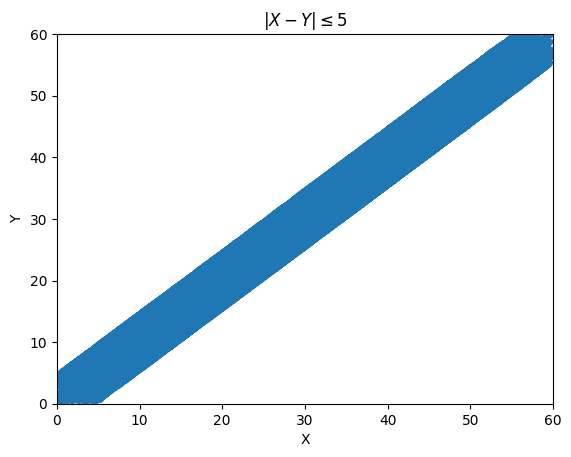

0.16009

In [ ]:
meetingProb()

In [ ]:
23/144

0.1597222222222222

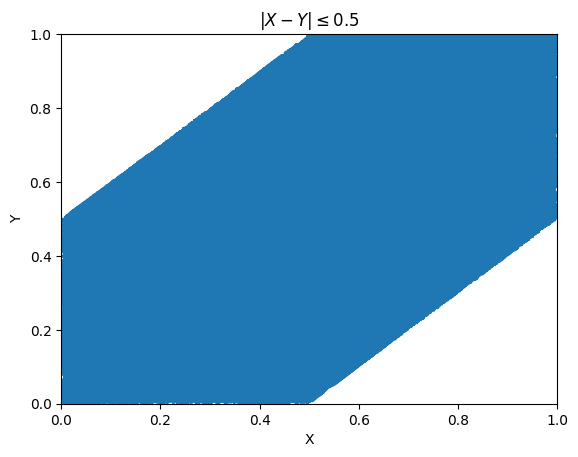

0.74922

In [ ]:
## Witches at the Coffee Shop (brain stellar)
meetingProb(a = 0, b = 1, restriction = 0.5)

In [ ]:
## probability of triangle, stick to triangle (brainstellar)
def probOfTriangle(picture = True, iters = 100_000):
  result = 0
  x_points, y_points = [], []
  for _ in range(iters):
    x, y = random.uniform(0,1), random.uniform(0,1)
    x, y = min(x,y), max(x,y)
    stick1, stick2, stick3 = x, y-x, 1-y
    cond1 = stick1 + stick2 > stick3
    cond2 = stick1 + stick3 > stick2
    cond3 = stick2 + stick3 > stick1
    if cond1 and cond2 and cond3:
      result += 1
      if picture:
        x_points.append(x)
        y_points.append(y)
  if picture:
    plt.plot(x_points, y_points, 'b')
    plt.plot(y_points, x_points, 'b') ## by symmetry
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Probability of Triangle')
    plt.show()
  return result / iters

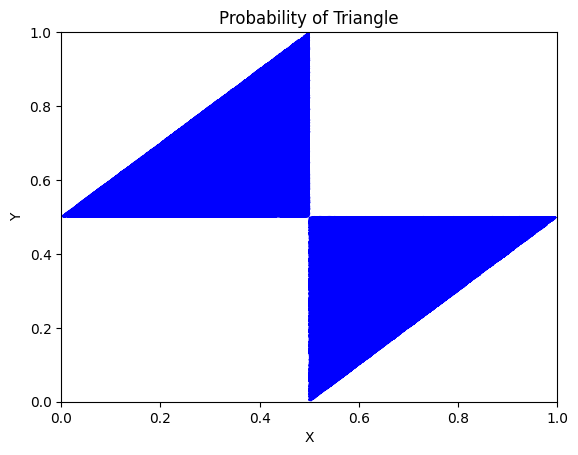

0.25007

In [ ]:
probOfTriangle()

In [ ]:
## gambler's ruin

def gamblersRuinSimulation(iters = 100_000):
  '''
  prob that the person that starts with 1 dollar wins
  '''
  def simulation():
    money = 1
    while 0 < money < 3:
      money += random.choice([1,1,-1])
    return 1 if money == 3 else 0

  avg_count = simulation()
  for i in range(2, iters+1):
    avg_count = avg_count * (i-1) / i + simulation() / i
  return avg_count

In [ ]:
gamblersRuinSimulation()

0.5720700000000106

In [ ]:
4/7

0.5714285714285714

## Probability Puzzles App

The probability puzzles we look at are from https://github.com/atorch/probability_puzzles. We focus on simulations here. Analytic solutions can be seen here https://github.com/hongwai1920/Probability-Puzzles.

Stats module: https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions

### Level: Getting Serious

In [ ]:
## 1
class Solution:
  def tosses(self, trials = 100_000):
    # result = [0] * trials
    mean_result = 0
    for i in range(trials):
      count = 0
      X = 0
      while X < 5:
        X = random.randint(1,6)
        count += 1
      # result[i] = count
      if i == 0:
        mean_result = count
      else:
        mean_result = mean_result * ((i)/(i+1)) + count / (i+1)
    # return result
    return mean_result

In [ ]:
sol = Solution()
tosses_trials = sol.tosses()
tosses_trials
# np.mean(tosses_trials)

2.995330000000003

In [ ]:
### use median data stream algo: max heap and min heap
# np.median(tosses_trials)

In [ ]:
## puzzle 2
class Solution:
  def sameBirthday(self, n = 3 ,trials = 100_000):
    count = 0
    for trial in range(trials):
      count += self.birthdayHelper(n)
    return count / trials


  def birthdayHelper(self, n):
    people = [random.randint(1,365) for _ in range(n)]
    if len(people) == len(set(people)):
      return 0
    return 1

In [ ]:
sol = Solution()
sol.sameBirthday()

0.00816

In [ ]:
## puzzle 3
sol = Solution()
n = 20
p = 0
while p < 0.50:
  n += 1
  p = sol.sameBirthday(n = n)
print(n)

23


In [ ]:
## puzzle 4
class Solution:
  def toss(self, trials = 10_000):
    mean_result = 0
    for i in range(trials):
      count = 0
      X = 0
      prev = 0
      while X != 1 or prev !=1:
        prev = X
        X = random.randint(0,1)
        count += 1
      if i == 0:
        mean_result = count
      else:
        mean_result = mean_result * ((i)/(i+1)) + count / (i+1)
    return mean_result

In [ ]:
sol = Solution()
sol.toss()

6.004400000000038

In [ ]:
## puzzle 9
class Solution:
  def toyManufacturer(self, trials = 100_000):
    for trial in range(1, trials+1):
      toy_coll = set()
      complete_coll = {i for i in range(1, 5)}
      boxes = 0
      while len(toy_coll) != len(complete_coll):
        toy = random.randint(1,4)
        toy_coll.add(toy)
        boxes += 1
      if trial == 1:
        mean_result = boxes
      else:
        mean_result = mean_result * ((trial-1) / (trial)) + boxes / (trial)
    return mean_result

In [ ]:
sol = Solution()
sol.toyManufacturer()

8.356849999999891

In [ ]:
## puzzle 11

class Solution:
  def probAwins(self, trials = 100_000):
    Awins_count = 0
    for trial in range(trials):
      winner = self.game()
      if winner == 'A':
        Awins_count += 1
    return Awins_count / trials

  def game(self):
    shooter = 0
    people = ['A', 'B', 'C']
    while len(people) > 1:
      shooter = shooter % len(people)
      target = (shooter + 1) % len(people)
      if people[shooter] in ['A', 'C']:
        if random.randint(0,1):
          people.remove(people[target])
      elif people[shooter] in ['B']:
        if random.choice([0, 1, 1, 1]): ## faster
        # if random.choices([0, 1], weights = [1,3])[0]:  ## slower
          people.remove(people[target])
      shooter += 1
    return people[0]

In [ ]:
sol = Solution()
sol.probAwins()

0.40627

In [ ]:
## puzzle 18
class Solution:
  def bacteriaPopulation(self, trials = 10_000):
    result = 0
    for trial in range(trials):
      result += self.death()
    return result / trials

  def death(self):
    bacteria = 2
    while bacteria > 0 and bacteria < 100:
      if random.choice([0, 1, 1, 1]):
      # if random.choices([0, 1], weights = [1,3])[0]:
        bacteria += 1
      else:
        bacteria -= 1
    return 0 if bacteria > 0 else 1

In [ ]:
sol = Solution()
sol.bacteriaPopulation()

0.1122

In [ ]:
## puzzle 19
class Solution:
  def probMultiples(self, trials = 100_000):
    count = 0
    for trial in range(trials):
      count += self.probMultHelper()
    return count / trial

  def probMultHelper(self):
    num = random.randint(1, 1000)
    for mult in [7, 11, 13]:
      if num % mult == 0:
        return 1
    return 0

In [ ]:
sol = Solution()
sol.probMultiples()

0.2812528125281253

In [ ]:
## puzzle 20
class Solution:
  def weather(self, trials = 100_000):
    result_avg = self.weatherHelper()
    for trial in range(2, trials+1):
      result_avg = result_avg * ((trial-1) / (trial)) + self.weatherHelper() / trial
    return result_avg


  def weatherHelper(self):
    weather_blocks = 1
    weather_prob = ['sunny'] * 4 + ['cloudy'] * 4 + ['rainy'] * 2
    random.shuffle(weather_prob)
    prev_weather = random.choice(weather_prob)
    for day in range(2, 10 + 1):
      curr_weather = random.choice(weather_prob)
      if curr_weather != prev_weather:
        weather_blocks += 1
      prev_weather = curr_weather
    return weather_blocks


In [ ]:
sol = Solution()
sol.weather()

6.751939999999923

In [ ]:
## puzzle 21
class Solution:
  def weatherMoreReal(self, trials = 100_000):
    result_avg = self.weatherHelper()
    for trial in range(2, trials+1):
      result_avg = result_avg * ((trial-1) / (trial)) + self.weatherHelper() / trial
    return result_avg


  def weatherHelper(self):
    weather_blocks = 1
    weather_prob = ['sunny'] * 4 + ['cloudy'] * 4 + ['rainy'] * 2
    prev_weather = random.choice(weather_prob)
    ## conditional weather
    weather_map = dict()
    weather_map['sunny'] = ['sunny'] * 2 + ['cloudy'] * 1 + ['rainy'] * 1
    weather_map['cloudy'] = ['sunny'] * 2 + ['cloudy'] * 1 + ['rainy'] * 1
    weather_map['rainy'] = ['cloudy']
    for day in range(2, 10 + 1):
      curr_weather = random.choice(weather_map[prev_weather])
      if curr_weather != prev_weather:
        weather_blocks += 1
      prev_weather = curr_weather
    return weather_blocks


In [ ]:
sol = Solution()
sol.weatherMoreReal()

7.302279999999917

In [ ]:
## puzzle 24

class Solution:
  def femalePop(self, trials = 100_000):
    n_female, n_children = 0, 0
    for trial in range(trials):
      x, y = self.femalePopHelper()
      n_female += x
      n_children += y
    return n_female / n_children

  def femalePopHelper(self):
    children_pop = ['female'] * 49 + ['male'] * 51
    child = random.choice(children_pop)
    children = [child]
    while child == 'male':  ## stop after having a female child
      child = random.choice(children_pop)
      children.append(child)
    return 1, len(children) ## number of female, total number of children

In [ ]:
sol = Solution()
sol.femalePop()

0.4908963276045732

In [ ]:
## puzzle 28

class Solution:
  def analogClock(self, trials = 1000):
    count = 0
    for trial in range(trials):
      count += self.analogClockHelper()
    return count / trials

  def analogClockHelper(self):
    # action = ['move'] * 99 + ['stuck']
    action = [1] * 99 + [0]
    hand = 0
    N = 10000
    for i in range(N):
      hand += random.choice(action)
      hand = hand % 12
    return 1 if hand == 3 else 0

In [ ]:
sol = Solution()
sol.analogClock()

0.084

In [ ]:
1/12

0.08333333333333333

### Level: Outrageous

In [ ]:
## puzzle 9

class Solution:
  def gambling(self, trials = 10_000):
    result = 0
    for trial in range(trials):
      result += self.gamblingHelper()
    return result / trials

  def gamblingHelper(self):
    money = 2
    wining = [1] * 3 + [-1]
    while money > 0 and money < 100:
      money += random.choice(wining)
    return 1 if money <=0 else 0

In [ ]:
sol = Solution()
sol.gambling(trials = 100000)

0.11

In [ ]:
1/9

0.1111111111111111

## Misc

$$
\frac{\text{area of a circle}}{\text{area of a square}} = \frac{\pi r^2}{4 r^2} = \frac{\pi}{4}
$$

In [ ]:
## calculating pi
def calculatePi(iters = 1_000_000):
  circle, square = 0, 0
  for _ in range(iters):
    x, y = random.uniform(-1,1), random.uniform(-1,1)
    if x **2 + y **2 <= 1:
      circle += 1
    square += 1
  return 4 * circle / square

In [ ]:
calculatePi()

3.141372

In [ ]:
## probability of real roots of ax^2 + 2bx + c = 0 where coef ~ Unif(0,1)
## translates to b^2 >= ac
def realRoots(iters = 100_000):
  count = 0
  for _ in range(iters):
    a, b, c = random.uniform(0,1), random.uniform(0,1), random.uniform(0,1)
    if b * b >= a * c:
      count += 1
  return count / iters

In [ ]:
realRoots()

0.55558

## Appendix

### OpenQuant (not mine)

Note that most of the code in this section is copied and pasted from https://openquant.co/questions.

In [ ]:
## Even Before Odd
import random

roll_dice = lambda: random.randint(1, 6)

valid_cases = 0
num_iters = 100_000
for i in range(num_iters):

    seen_faces = set()
    while(True):

        roll = roll_dice()
        seen_faces.add(roll)

        if roll % 2 == 1 and len(seen_faces) < 4:
            break

        if len(seen_faces) == 6:
            valid_cases += 1
            break

print(valid_cases / num_iters)

0.04967


In [ ]:
## Race to Ace
import random
from typing import Tuple
from itertools import product

suits = ['S', 'C', 'D', 'H']
ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']

class Deck:
    def __init__(self) -> None:
        """Initialize a deck of cards"""
        self.cards = [(rank, suit) for rank, suit in product(ranks, suits)]

    def shuffle(self) -> None:
        """Shuffle a deck of cards"""
        self.cards = random.sample(self.cards, 52)

    def draw(self) -> Tuple[str, str]:
        """Draw a card from the deck"""
        return self.cards.pop()

    def isEmpty(self) -> bool:
        """Check if the deck has cards"""
        return self.cards == []

def simulation() -> int:
    deck = Deck()
    deck.shuffle()

    cards_drawn = 0

    # Keep drawing until we find an ace
    while not deck.isEmpty():
        suit, rank = deck.draw()
        cards_drawn += 1

        if suit == "A":
            return cards_drawn

    return cards_drawn

cards_needed = [simulation() for _ in range(10_000)]

# Get the expected number of cards until we draw our first ace
print(sum(cards_needed) / len(cards_needed))

10.6396


In [ ]:
## Highest Roll EV
import random

roll_dice = lambda: random.randint(1, 6)

results = []
num_iters = 10_000
for i in range(num_iters):

    highest = 0
    while(True):

        roll = roll_dice()
        highest = max(highest, roll)

        if roll == 4:
            break

    results.append(highest)

print(sum(results) / num_iters)

5.1828


In [ ]:
## Dice Game 1
import random
from typing import Callable

random.seed(42)

roll_dice: Callable[[None], int] = lambda: random.randrange(1, 7, 1)

def play_game() -> bool:
    """Returns a boolean indicating whether player A won"""
    pa_turn = True
    while True:
        dice_roll_sum = roll_dice() + roll_dice()
        if pa_turn and dice_roll_sum == 6:
            return True
        if not pa_turn and dice_roll_sum == 7:
            return False
        pa_turn = not pa_turn

iterations = 10_000
pa_win_prob = sum([play_game() for _ in range(iterations)]) / iterations
print(f"The probability of Player A winning is {pa_win_prob}")

The probability of Player A winning is 0.4917


In [ ]:
## First Steps
import random

#logs state baby has traveled to
state_log = [0]

num_transitions = 10_000
for i in range(num_transitions):

    #modeling random walk using random variable t
    t = random.randint(1,10)

    if t <= 2:
        state_log.append(state_log[-1] + 1)
    elif t <= 7:
        state_log.append(state_log[-1])
    else:
        state_log.append(max(state_log[-1] - 1, 0))

#Expecting value close to 1/3
print((state_log.count(0)-1)/len(state_log))

0.3290670932906709


In [ ]:
## Ten Floor Building
import random

def simulate_trial() -> int:
    # each of the 12 people pick a random floor between 1 and 10
    floors = [random.randint(1, 10) for _ in range(12)]

    # count the number of unique floors the elevator must stop at
    return len(set(floors))

# list of the number of floors the elevator stopped at for each trial
res = [simulate_trial() for _ in range(10_000)]

# compute the average, or expected number of floors the elevator needed to stop at over all 10,000 trials
print(sum(res) / len(res))

7.1563


In [ ]:
## Dot Placement
import random

# Place 3 dots randomly on 1 of 8 sides
simulation = lambda: len(set([random.randint(1, 8) for _ in range(3)])) == 3

# Run 10,000 simulations
simulations = [simulation() for _ in range(10_000)]

# Find the proportion of simulations in which all three dots are placed on a unique edge
print(f"Answer: {sum(simulations) / len(simulations)}")

Answer: 0.6474


In [ ]:
## Multiple of 6
import random
from typing import Callable

roll_dice: Callable [[None], int] = lambda: random.randrange(1,7)

total_rolls = 0
num_iters = 10_000
#simulates rolling until we get a multiple of 6 num_iters times
for i in range(num_iters):

   run_sum = roll_dice()
   rolls = 1

   #reroll until the sum is a multiple of 6
   while run_sum % 6 != 0:
      run_sum += roll_dice()
      rolls += 1

   total_rolls += rolls

#expecting value close to 6.00
print(total_rolls/num_iters)

6.0424


In [ ]:
## Conditional Dice Rolls

## part 1
import random

roll_dice = lambda: random.randint(1,6)

sequence_lengths = []
num_iters = 10_000
for i in range(num_iters):

    sequence = []
    while(True):

        sequence.append(roll_dice())

        if sequence[-1] == 5:
            break
        elif sequence[-1] == 6:
            sequence_lengths.append(len(sequence))
            break

print(sum(sequence_lengths)/len(sequence_lengths))
## part 2
import random

roll_dice = lambda: random.randint(1,6)

sequence_lengths = []
num_iters = 10_000
for i in range(num_iters):

    sequence = []
    while(True):

        sequence.append(roll_dice())

        if sequence[-1] == 6:
            if 5 in sequence:
                sequence_lengths.append(len(sequence))
            break

print(sum(sequence_lengths)/len(sequence_lengths))
## part 3
import random

roll_dice = lambda: random.randint(1,6)

sequence_lengths = []
num_iters = 10_000

for i in range(num_iters):
    sequence = []

    while(True):
        sequence.append(roll_dice())

        if sequence[-1] == 1:
            break
        elif sequence[-1] == 3:
            break
        elif sequence[-1] == 5:
            break
        elif sequence[-1] == 6:
            sequence_lengths.append(len(sequence))
            break

print(sum(sequence_lengths)/len(sequence_lengths))

3.0948994106888845
8.80032401782098
1.503257328990228


In [ ]:
## Three Rings

import random
import numpy as np

# PART 1

def simulate_trial():
    lst = []
    for i in range(3):
        # randomly choose A, B, or C according to respective probabilities
        val = np.random.choice(["A", "B", "C"], p=[1/9, 3/9, 5/9])
        lst.append(val)
    return lst

# counter number of successes
num_successes = 0

# simulate trial 100,000 times
for i in range(100000):
    trial = simulate_trial()
    # see if there are three unique values -> A, B, C
    if len(np.unique(trial)) == 3:
        # if so, increase the number of successes by 1
        num_successes += 1

# expected proportion around 90/729 or 0.1234
print(num_successes/100000)

import random
import numpy as np
from collections import Counter

# PART 2

n = 3

def simulate_trial():
    lst = []
    for i in range(3*n):
        val = np.random.choice(["A", "B", "C"], p=[1/9, 3/9, 5/9])
        lst.append(val)
    return lst

num_successes = 0

# simulate trial 100,000 times
for i in range(100000):
    trial = simulate_trial()
    dict_ = Counter(trial)
    # if each A, B, and C show up exactly 3 times
    if (dict_["A"] == 3 and dict_["B"] == 3 and dict_["C"] == 3):
        num_successes += 1

# expected proportion around 0.0146 or 1.46%
print(num_successes / 100000)

0.12284
0.01462


In [ ]:
## King of Hearts
import random

suits = ['S', 'C', 'D', 'H']
ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']

class Deck:
    def __init__(self):
        self.cards = []
        for suit in suits:
            for rank in ranks:
                self.cards.append([rank, suit])

    def shuffle(self):
        # shuffles deck of cards
        return random.sample(self.cards, 52)

# number of decks where the first ace is on the 14th draw
num_valid_decks = 0
num_15th_is8h = 0

# create 10,000,000 shuffled decks
# see how many of the decks, where the first ace is on the 14th draw, have 8h as the next card
for i in range(1_000_000):
    deck = Deck().shuffle()

    # excluding all decks with an ace not being on the 14th draw
    if deck[13][0] != 'A':
        continue

    # exlcuding all decks with an ace in the first 13 draws
    for j in range(13):
        if deck[j][0] == 'A':
            break
    else:
        num_valid_decks += 1
        #checking if 15th card is 8 of hearts
        if deck[14]== ['K', 'H']:
            num_15th_is8h += 1

# should be expecting 35/1824 ~ 0.0191886
print(num_15th_is8h / num_valid_decks)

0.018182403295359466


In [ ]:
## Biased Coin Sequence
import random

flip_coin = lambda: 'T' if random.randint(1, 3) == 1 else 'H'

sequence_lengths = []
num_iters = 100_000
for i in range(num_iters):

    sequence = [flip_coin()]
    while(True):

        sequence.append(flip_coin())
        if sequence[-2]=='T' and sequence[-1]=='H':
            sequence_lengths.append(len(sequence))
            break

print(sum(sequence_lengths) / num_iters)

4.50679


In [ ]:
## Three Sticks
import random

def simulate_trial():
   x, y = random.uniform(0, 1), random.uniform(0, 1)
   x, y = min(x, y), max(x, y)
   sides = [x, y-x, 1-y]
   return min(sides)

res = []

for _ in range(1_000_000):
   val = simulate_trial()
   res.append(val)

print(len([i for i in res if i <= 0.2]) / len(res))

0.840222


In [ ]:
## Four of a Kind
import random
import collections

suits = ['S', 'C', 'D', 'H']
ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']

class Deck:
    def __init__(self):
        self.cards = []
        for suit in suits:
            for rank in ranks:
                self.cards.append([rank, suit])

    def random_hand(self, size):
        # returns a hand with num cards = size
        return random.sample(self.cards, size)

deck = Deck()
num_fours = 0

# draw 5 cards from standard deck 1,000,000 times,
# see how many of them result in a 4 of a kind
for i in range(1000000):
    hand = deck.random_hand(5)
    ranks = [i[0] for i in hand]
    # create dictionary with counter of frequency of each suit
    count = collections.Counter(ranks)
    max_ = max(count.values())
    if max_ == 4:
        num_fours += 1

# should be expecting 0.00024 * 1,000,000 = around 240
print(num_fours)

239


# End